In [ ]:
import pandas as pd
from google.colab import drive

In [6]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/ultimosdatos.xlsx'
df = pd.read_excel(file_path)
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Numero,Hora,Temp1,Temp2,Temp3,TempAmbiente,Temp4
0,1,2024-08-19 10:29:33,31.03,33.03,31.20,35.40,31.82
1,2,2024-08-19 10:29:47,31.03,33.03,31.23,35.54,31.83
2,3,2024-08-19 10:30:03,31.03,33.01,31.23,35.60,31.82
3,4,2024-08-19 10:30:18,31.05,32.98,31.23,35.71,31.82
4,5,2024-08-19 10:30:33,31.03,32.97,31.24,35.70,31.81


In [7]:
# Convertir la columna 'Hora' al formato datetime
df['Hora'] = pd.to_datetime(df['Hora'])

# Revisar si hay valores nulos
print(df.isnull().sum())



Numero          0
Hora            0
Temp1           0
Temp2           0
Temp3           0
TempAmbiente    0
Temp4           0
dtype: int64


In [10]:
# Imprimir los nombres exactos de las columnas
print(df.columns)


Index(['Numero', 'Hora', 'Temp1', 'Temp2', 'Temp3', 'TempAmbiente', 'Temp4'], dtype='object')


In [9]:
# Variables independientes (Temperaturas)
X = df[['Temp1', 'Temp2', 'Temp3', 'TempAmbiente']]

# Variable dependiente (Promedio de temperaturas)
y = df['Temp4']


In [11]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Crear las características polinómicas de grado 2
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Ajustar un modelo de regresión lineal con las características polinómicas
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_poly_test)


In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")


MSE: 8.371767329598367e-06
R²: 0.9999971972735945


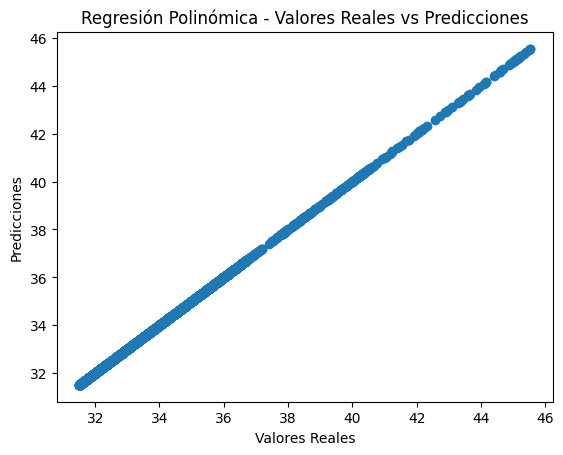

In [14]:
import matplotlib.pyplot as plt

# Graficar las predicciones vs los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Polinómica - Valores Reales vs Predicciones')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Numero          0
Hora            0
Temp1           0
Temp2           0
Temp3           0
TempAmbiente    0
Temp4           0
dtype: int64
Index(['Numero', 'Hora', 'Temp1', 'Temp2', 'Temp3', 'TempAmbiente', 'Temp4'], dtype='object')
Outliers según Z-score:
       Numero                Hora  Temp1  Temp2  Temp3  TempAmbiente  Temp4
0           1 2024-08-19 10:29:33  31.03  33.03  31.20         35.40  31.82
1           2 2024-08-19 10:29:47  31.03  33.03  31.23         35.54  31.83
2           3 2024-08-19 10:30:03  31.03  33.01  31.23         35.60  31.82
3           4 2024-08-19 10:30:18  31.05  32.98  31.23         35.71  31.82
4           5 2024-08-19 10:30:33  31.03  32.97  31.24         35.70  31.81
...       ...                 ...    ...    ...    ...           ...    ...
23116   23117 2024-08-23 11:53:08  33.65  44.09  34.50         41.17  37.73
23117 

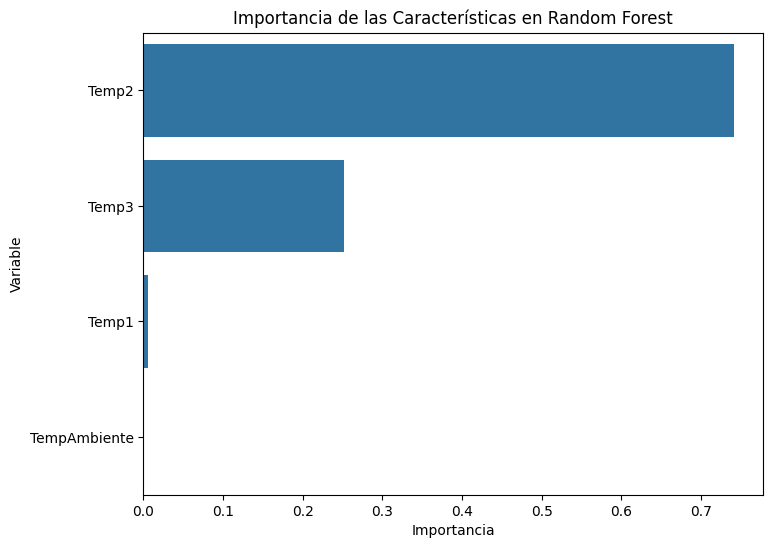

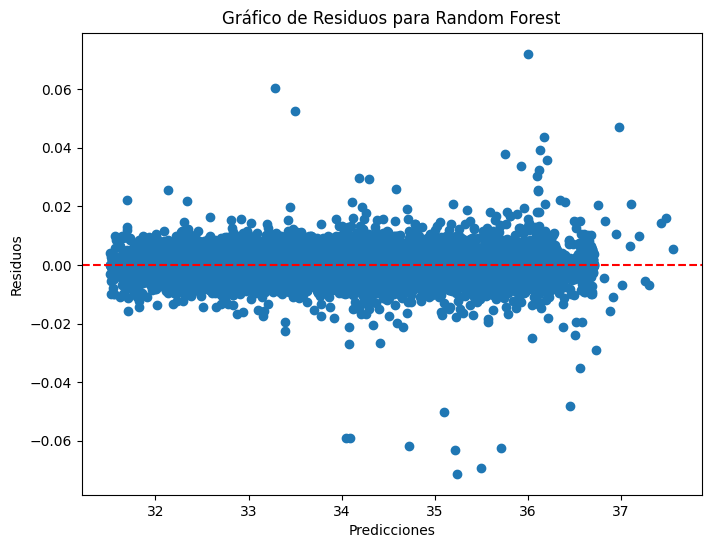

MSE promedio con validación cruzada: 0.04187584168233654
Mejores parámetros: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Correlación de Kendall:
                  Temp1     Temp2     Temp3  TempAmbiente     Temp4
Temp1         1.000000  0.784273  0.724408      0.251314  0.754814
Temp2         0.784273  1.000000  0.768870      0.391053  0.867954
Temp3         0.724408  0.768870  1.000000      0.448131  0.901168
TempAmbiente  0.251314  0.391053  0.448131      1.000000  0.433639
Temp4         0.754814  0.867954  0.901168      0.433639  1.000000


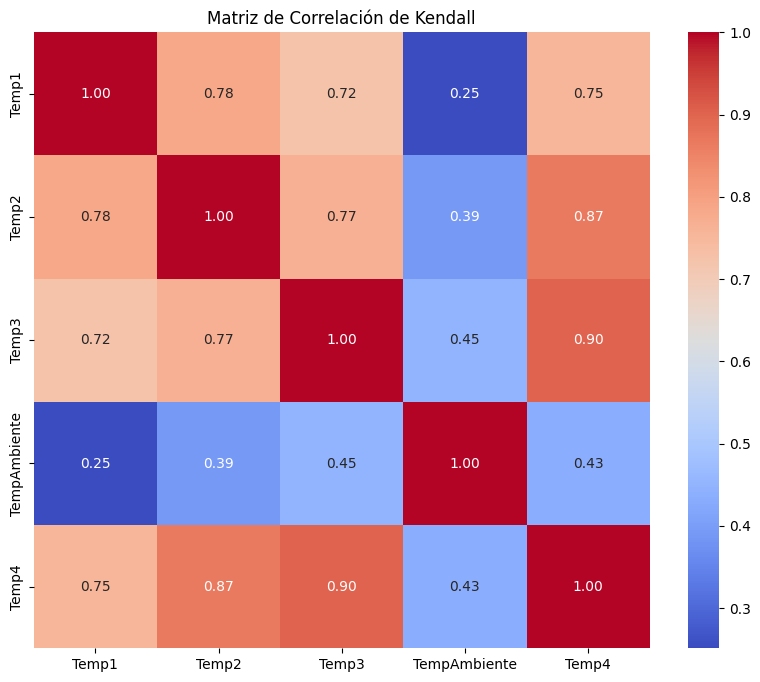

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import matplotlib.dates as mdates

# Montar Google Drive
drive.mount('/content/drive')

# Cargar los datos desde Excel
file_path = '/content/drive/My Drive/Colab Notebooks/ultimosdatos.xlsx'
df = pd.read_excel(file_path)

# Convertir la columna 'Hora' al formato datetime
df['Hora'] = pd.to_datetime(df['Hora'])

# Revisar si hay valores nulos
print(df.isnull().sum())

# Imprimir los nombres exactos de las columnas
print(df.columns)

# Método Z-score para identificar outliers
z_scores = np.abs(stats.zscore(df[['Temp1', 'Temp2', 'Temp3', 'TempAmbiente', 'Temp4']]))
threshold = 3
outliers_zscore = df[(z_scores > threshold).any(axis=1)]

# Resultados de outliers
print("Outliers según Z-score:")
print(outliers_zscore)
print(f"Número de outliers según Z-score: {outliers_zscore.shape[0]}")

# Filtrar el DataFrame para eliminar los outliers
df_sin_outliers_zscore = df[~df.index.isin(outliers_zscore.index)]

# Variables independientes (Temperaturas)
X = df_sin_outliers_zscore[['Temp1', 'Temp2', 'Temp3', 'TempAmbiente']]

# Variable dependiente (Promedio de temperaturas)
y = df_sin_outliers_zscore['Temp4']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_rf = modelo_rf.predict(X_test)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")

# Importancia de las características
importancia_rf = modelo_rf.feature_importances_
importancia_df = pd.DataFrame({'Variable': X.columns, 'Importancia': importancia_rf})
print("Importancia de las características:\n", importancia_df)

# Visualizar la importancia de las características
plt.figure(figsize=(8, 6))
sns.barplot(x='Importancia', y='Variable', data=importancia_df.sort_values(by='Importancia', ascending=False))
plt.title('Importancia de las Características en Random Forest')
plt.show()

# Análisis de Errores
residuos = y_test - y_pred_rf
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos para Random Forest')
plt.show()

# Validación Cruzada
scores = cross_val_score(modelo_rf, X, y, cv=5, scoring='neg_mean_squared_error')
mse_cv = -scores.mean()
print(f"MSE promedio con validación cruzada: {mse_cv}")

# Ajuste de Hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f"Mejores parámetros: {grid_search.best_params_}")

# Correlación de Kendall
kendall_corr = df_sin_outliers_zscore[['Temp1', 'Temp2', 'Temp3', 'TempAmbiente', 'Temp4']].corr(method='kendall')
print("Correlación de Kendall:\n", kendall_corr)

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación de Kendall')
plt.show()


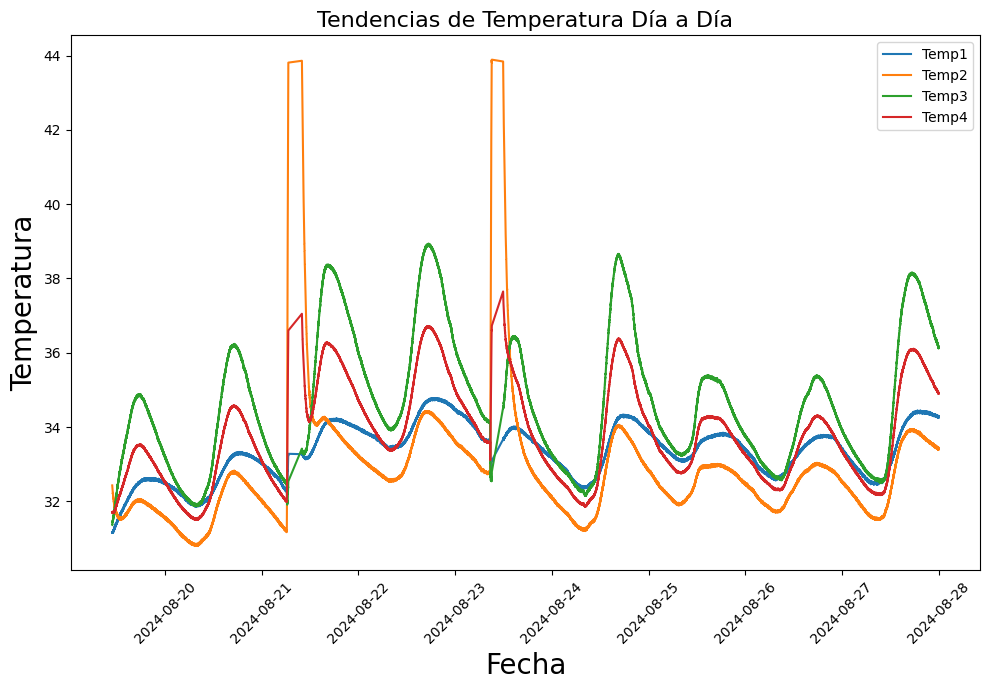

In [16]:
import matplotlib.dates as mdates

# Tendencias en el tiempo
plt.figure(figsize=(10, 7))  # Aumentar el tamaño de la figura
plt.plot(df_sin_outliers_zscore['Hora'], df_sin_outliers_zscore['Temp1'], label='Temp1')
plt.plot(df_sin_outliers_zscore['Hora'], df_sin_outliers_zscore['Temp2'], label='Temp2')
plt.plot(df_sin_outliers_zscore['Hora'], df_sin_outliers_zscore['Temp3'], label='Temp3')
plt.plot(df_sin_outliers_zscore['Hora'], df_sin_outliers_zscore['Temp4'], label='Temp4')

# Establecer el formato para mostrar solo la fecha (sin hora)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Configurar el eje X para mostrar solo los días
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Marcas para cada día

plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Temperatura', fontsize=20)
plt.title('Tendencias de Temperatura Día a Día', fontsize=16)
plt.legend()

# Rotar las etiquetas de fecha
plt.xticks(rotation=45, fontsize=10)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-24-46c0d46f4e4e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['HoraSegundos'] = (df_filtered['Hora'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


Área bajo la curva para Temp1 (5 am - 2 pm, día 21): 1952169.0299999998
Área bajo la curva para Temp2 (5 am - 2 pm, día 21): 2200119.9899999998
Área bajo la curva para Temp3 (5 am - 2 pm, día 21): 2070485.11
Área bajo la curva para Temp4 (5 am - 2 pm, día 21): 2070485.11
Área bajo la curva para TempAmbiente (5 am - 2 pm, día 23): 2020504.325


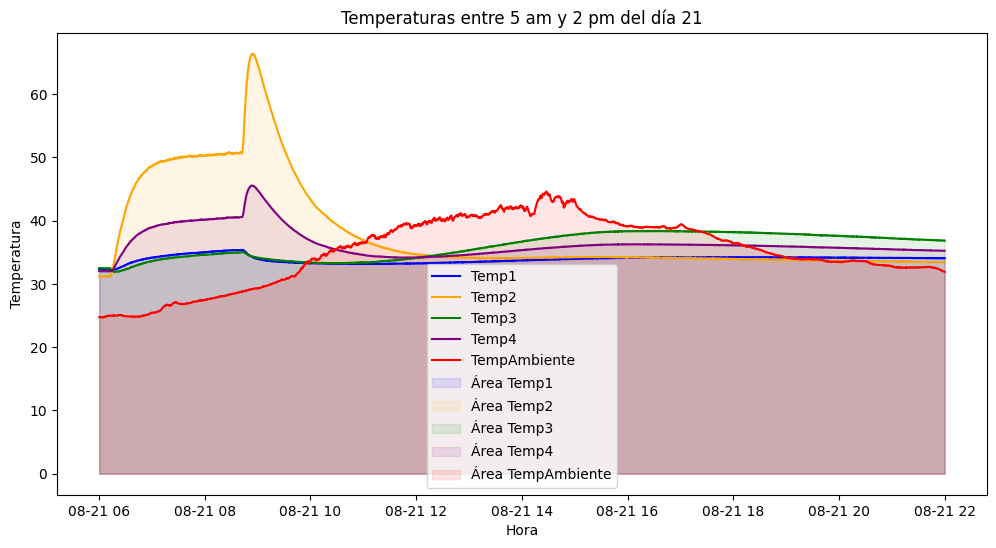

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Montar Google Drive y cargar datos
from google.colab import drive
drive.mount('/content/drive')

# Cargar el archivo Excel
file_path = '/content/drive/My Drive/Colab Notebooks/ultimosdatos.xlsx'
df = pd.read_excel(file_path)

# Convertir la columna 'Hora' al formato datetime
df['Hora'] = pd.to_datetime(df['Hora'])

# Filtrar los datos para el día 21 entre 5:00 AM y 2:00 PM
start_time = pd.Timestamp(df['Hora'].dt.year.iloc[0], df['Hora'].dt.month.iloc[0], 21, 6, 0, 0)
end_time = pd.Timestamp(df['Hora'].dt.year.iloc[0], df['Hora'].dt.month.iloc[0], 21, 22, 0, 0)
df_filtered = df[(df['Hora'] >= start_time) & (df['Hora'] <= end_time)]

# Convertir la columna 'Hora' a segundos desde epoch (1970-01-01)
df_filtered['HoraSegundos'] = (df_filtered['Hora'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Calcular el área bajo la curva para cada sensor usando el método del trapecio en el rango de tiempo seleccionado
area_temp1 = np.trapz(df_filtered['Temp1'], df_filtered['HoraSegundos'])
area_temp2 = np.trapz(df_filtered['Temp2'], df_filtered['HoraSegundos'])
area_temp3 = np.trapz(df_filtered['Temp3'], df_filtered['HoraSegundos'])
area_temp4 = np.trapz(df_filtered['Temp4'], df_filtered['HoraSegundos'])
area_TempAmbiente = np.trapz(df_filtered['TempAmbiente'], df_filtered['HoraSegundos'])


# Resultados
print(f"Área bajo la curva para Temp1 (5 am - 2 pm, día 21): {area_temp1}")
print(f"Área bajo la curva para Temp2 (5 am - 2 pm, día 21): {area_temp2}")
print(f"Área bajo la curva para Temp3 (5 am - 2 pm, día 21): {area_temp3}")
print(f"Área bajo la curva para Temp4 (5 am - 2 pm, día 21): {area_temp3}")
print(f"Área bajo la curva para TempAmbiente (5 am - 2 pm, día 23): {area_TempAmbiente}")

# Graficar para visualizar
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Hora'], df_filtered['Temp1'], label='Temp1', color='blue')
plt.plot(df_filtered['Hora'], df_filtered['Temp2'], label='Temp2', color='orange')
plt.plot(df_filtered['Hora'], df_filtered['Temp3'], label='Temp3', color='green')
plt.plot(df_filtered['Hora'], df_filtered['Temp4'], label='Temp4', color='purple')
plt.plot(df_filtered['Hora'], df_filtered['TempAmbiente'], label='TempAmbiente', color='red')

# Rellenar el área bajo las curvas
plt.fill_between(df_filtered['Hora'], df_filtered['Temp1'], alpha=0.1, color='blue', label='Área Temp1')
plt.fill_between(df_filtered['Hora'], df_filtered['Temp2'], alpha=0.1, color='orange', label='Área Temp2')
plt.fill_between(df_filtered['Hora'], df_filtered['Temp3'], alpha=0.1, color='green', label='Área Temp3')
plt.fill_between(df_filtered['Hora'], df_filtered['Temp4'], alpha=0.1, color='purple', label='Área Temp4')
plt.fill_between(df_filtered['Hora'], df_filtered['TempAmbiente'], alpha=0.1, color='red', label='Área TempAmbiente')

plt.xlabel('Hora')
plt.ylabel('Temperatura')
plt.title('Temperaturas entre 5 am y 2 pm del día 21')
plt.legend()
plt.show()
